# Data Visualisation - Lab 7 - Visualising Algorithms

---

**Authors: Claire Rocks, Richard Kirk and Saif Anwar**

---

Data isn't the only thing that can be visualised, we can visualise processes and concepts. By doing this, we can gain a better understanding of how things work, and how different sections interconnect. This Lab will be looking at how we can visualise different algorithms. In particular, we will be looking at sorting algorithms and graph algorithms.

## Setup for the lab

As always, lets install all the required libraries we will need. All of these libraries we have seen before:
  * `numpy` - required for maths calculations
  * `matplotlib` - drawing plots
  * `networkx` - drawing graphs
  * `plotly` - plot some cool graphs
  * `ipywidgets` - interactive controls

In [1]:
%pip install numpy matplotlib plotly ipywidgets networkx

import numpy as np
from ipywidgets import interact
import ipywidgets as widgets

import plotly.graph_objects as go

import networkx as nx
import matplotlib.pyplot as plt


[notice] A new release of pip available: 22.3.1 -> 24.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Initial state

First, we are going to create a graph of some data. This data is going to be random, so we can apply algorithms to it and see how it changes easily. Because we might reset the graph multiple times, we'll create a function that we can call later on.

In [2]:
## Plot our random numbers on a bar graph
graph = go.FigureWidget()
data = []

graph.add_bar(y=data)

## We are going to have to repeatedly randomise the data, so we're defining a function to do it for us
def randomiseData(x=100):
    data = np.random.rand(x)
    graph.data[0].y = data
    return data

## Plot the randomised data
data = randomiseData()

## Display our data
graph.show()

## Bubble Sort

One of the easiest algorithms to show is sorting a collection of random data. You may remember the Bubble Sort algorithm ([here](https://en.wikipedia.org/wiki/Bubble_sort)) does this by checking a pair of values and rearranging the pair if in the wrong order. We repeat this until we have checked that all pairs are in the same order.

### Defining a step

From the above description, you can see that each step in the algorithm takes a pair of elements next to each other, checks if they are in the correct order, then swaps them if they are not. We can therefore define a function which does this, given a position and an array of data.

In [3]:
## Define a function for Bubble Sort step
def bubbleStep(i = 0, thisData=data):
    if thisData[i] > thisData[i+1]:
        tmp = thisData[i]
        thisData[i] = thisData[i+1]
        thisData[i+1] = tmp
    return thisData

### Testing it out
In order to test whether our algorithm is correct, lets just do a sanity check! By running `bubbleStep` a large amount of times (the number of elements squared), we can ensure all the data is sorted.

In [4]:
## Test it out by running through the algorithm
for i in range(0, len(data)):
    for j in range(0, (len(data)-1)):
        data = bubbleStep(j, data)

## Show the data
graph.data[0].y = data
graph.show()

When we run the code, the graph we generated in our initial code block will have been sorted. Therefore, our algorithm works if we run it enough times. 

### Combining with widgets

From the previous lab, you'll remember that we created some play and timer widgets. We can utilise these (along with the formatting widgets we talked about) to iterate over each step. To make it even clearer which pair of elements are being examined, we can highlight the pair of elements using a different colours (with the red being the left hand element of the pair, and orange being the right hand element of the pair).

In [5]:
## Randomise the data
data = randomiseData()

## Build the widgets
play = widgets.Play(min=0, max=((len(data))*(len(data)-1)), interval=0.01, value=0)
total = widgets.IntProgress(min=0, max=(len(data)-1), description="Iterations: ", disabled=True)
position = widgets.IntProgress(min=0, max=(len(data)-1), description="Steps: ", disabled=True)

## Copy the graph into a new figure widget
bubbleGraph = go.FigureWidget(graph)

## Put all of this together
bubbleSort = widgets.HBox([widgets.VBox([play, total, position],layout=widgets.Layout(justify_content='space-around')), bubbleGraph])

## Set up the update
@interact(x=play)
def update(x):
    global data
    # Run one iteration of bubble sort to cycle through all of the data.
    for i in range(x,x+len(data)):
        with bubbleGraph.batch_update():
            value = np.mod(i, len(data)-1)

            colours = ['blue'] * len(data)
            colours[value] = 'red'
            
            colours[value+1] = 'orange'
            
            data = bubbleStep(value, data)
            bubbleGraph.data[0].y = data
            bubbleGraph.data[0].marker.color = colours

            position.value = np.mod(i,(len(data)-1))
    # Update the iteration count after all data has been cycled through.
    total.value = np.floor((x*len(data))/(len(data)-1))

## Display everything together
bubbleSort

interactive(children=(Play(value=0, description='x', interval=0, max=9900), Output()), _dom_classes=('widget-i…

The code for this looks a bit more complex than you are used to from previous labs. As such, I would take some time to break down how it works and have a play.

## Graph Searching

Why stop at sorting, we can do some searching as well! Dijkstra's algorithm ([here](https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm)) is one of the key graph algorithms for finding the shortest path between a node and any other node, given that the edges in our graph has a weight. Lets build up an example of this...

### Generating the nodes

First up, lets build up the initial state. Our graph is going to have *n* nodes and at least 1 edge from each node. 

In the code block below, we create the *n* nodes and name them with a letter. We'll be using the **NetworkX** package from Lab 4, seeing as though it is a graph package we are familiar with.

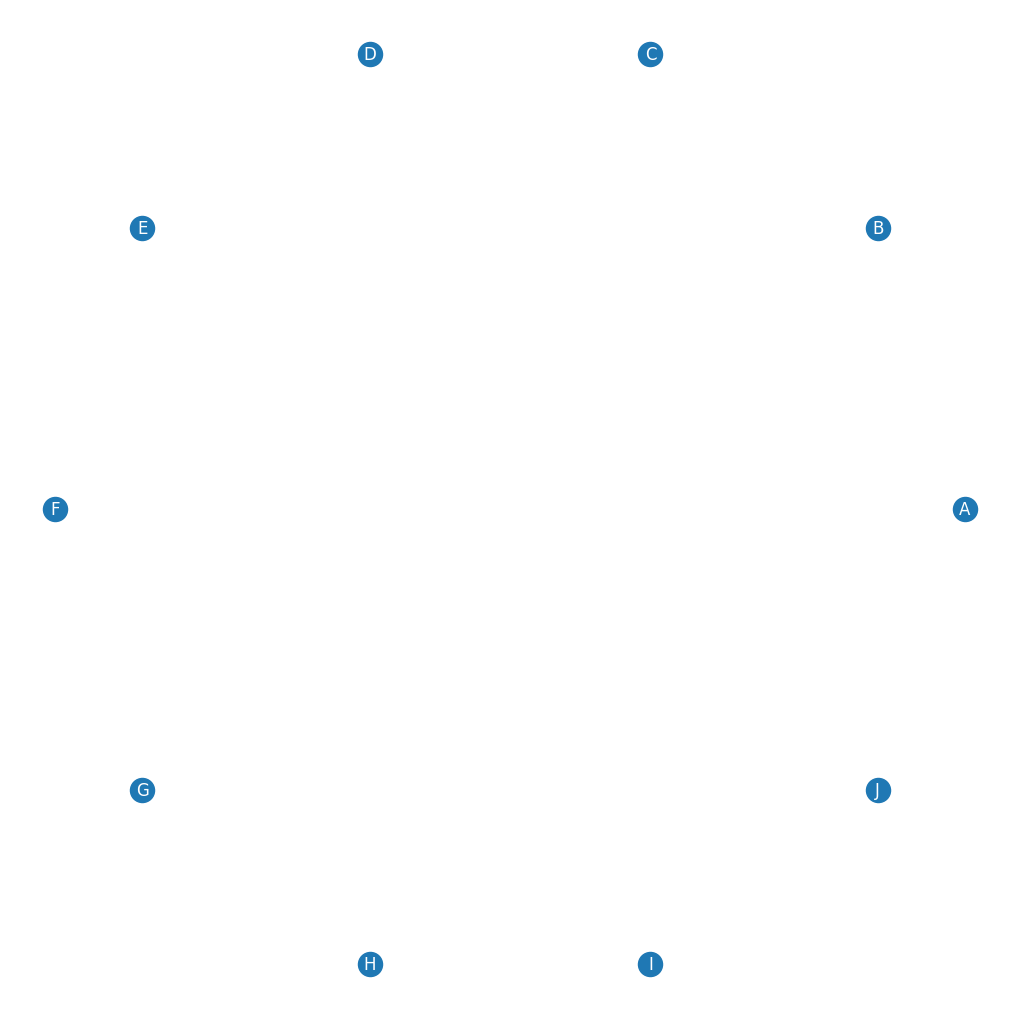

In [6]:
## Create key variables
graph = nx.Graph()  ## The graph we will be manipulating
numberNodes = 10  ## The number of nodes we will be generating
edgePerWeight=(0,5)  ## The range of the weights we will be applying to each edge

## Add our nodes in, giving them a letter name (because it looks cooler and it makes it more obvious when we can replace them later)
for i in range(0, numberNodes):
    nodeName = chr(i+65)
    graph.add_node(nodeName)

## Display our graph. We have used a circular layout as it makes the edges clearer to see, but you can use whatever layout you want
pos = nx.circular_layout(graph)
plt.figure(figsize=[10,10])
nx.draw(graph, pos, font_color='white', with_labels=True)
plt.show()

### Generating the edges

Now that we have the nodes, lets connect them! Each edge will have a random weight between the two values given in the previous code block. We also make sure that the edges don't link back to itself...

A  --  1.58  --  C
B  --  4.59  --  A
C  --  3.85  --  B
C  --  1.72  --  J
C  --  2.29  --  F
D  --  2.24  --  I
D  --  3.06  --  I
D  --  2.98  --  I
E  --  2.44  --  G
E  --  1.48  --  G
F  --  2.97  --  H
F  --  1.82  --  C
F  --  4.56  --  D
G  --  3.38  --  D
G  --  1.14  --  F
G  --  1.83  --  J
H  --  0.74  --  I
H  --  0.19  --  C
H  --  2.76  --  B
I  --  4.57  --  G
I  --  2.31  --  B
I  --  3.78  --  J
J  --  1.28  --  D


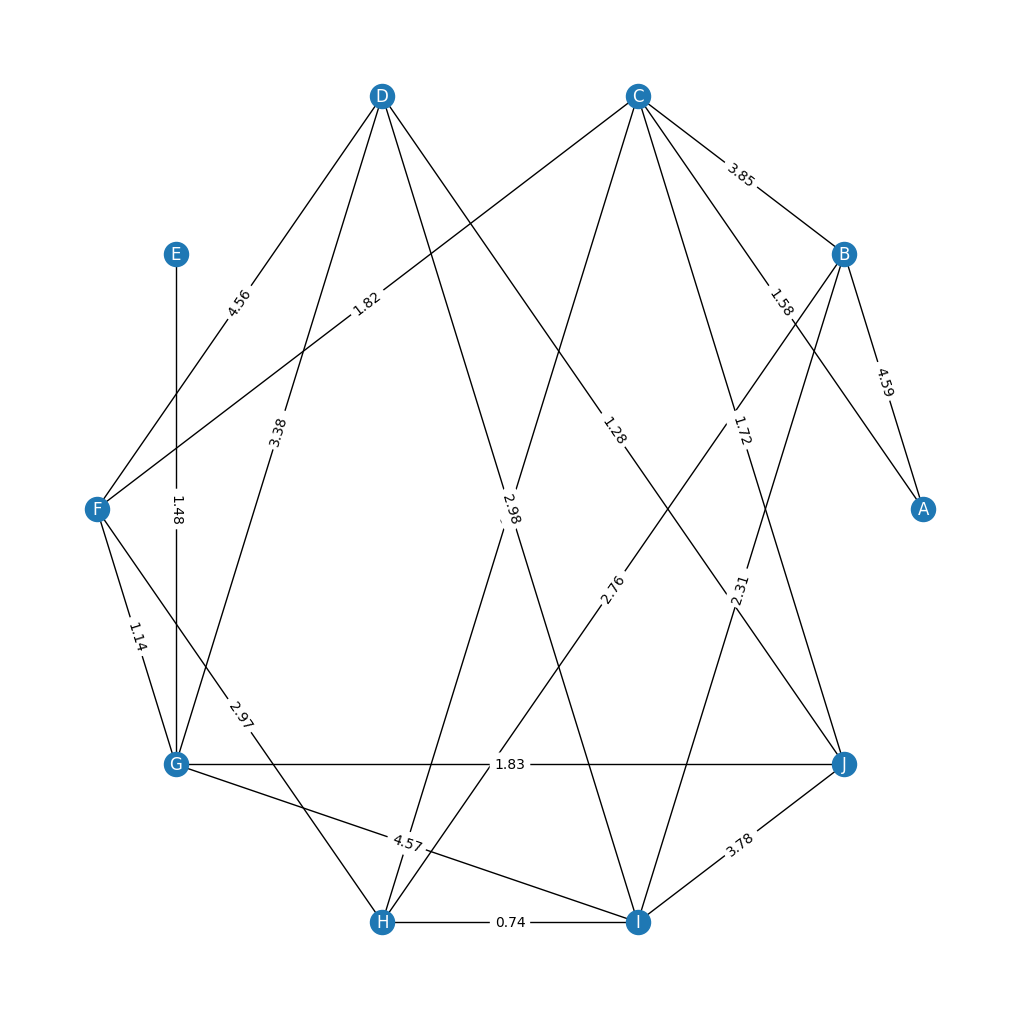

In [7]:
## Generate a collection of edges, ensuring that each node has at least 1 edge attached to it
for i in range(0, numberNodes):  ## Iterate through the nodes
    nodeName = chr(i+65)
    for j in range(0, np.random.randint(1, 4)):  ## Calculate how many edges are to be added
        flag = True
        while flag:  ## Make sure the edge doesn't link back to itself...
            endPoint = chr(np.random.randint(0, numberNodes)+65)
            if endPoint != nodeName:
                flag = False
        weight = np.round((edgePerWeight[0] + (np.random.rand()*edgePerWeight[1])), 2)  ## Add our weight (we have rounded it to 2.d.p)
        print(nodeName , " -- ", weight, " -- ", endPoint)
        graph.add_edge(nodeName, endPoint, weight=weight)  ## Add our edge to the graph

## Lets draw the graph again, using the same positions. We will also draw labels on the edges corresponding to the weights
plt.figure(figsize=[10,10])
nx.draw(graph, pos, font_color='white', with_labels=True)
nx.draw_networkx_edge_labels(graph, pos, edge_labels=nx.get_edge_attributes(graph, 'weight'))
plt.show()

### Defining a step in our algorithm

Just like the Bubble Sort, we'll write a step in the algorithm that we can repeat. 

First of all, we need to set the distance metric (`0` for the start node, `sys.maxsize` for all other nodes), along with setting all nodes checked to `False` and previous to `None`.

Next, we build a Dijkstra's step. We find the shortest distance that hasn't been checked, and update the connected nodes if it is shorter.

Selected Node: {'node': 'A', 'distance': 0, 'checked': False}


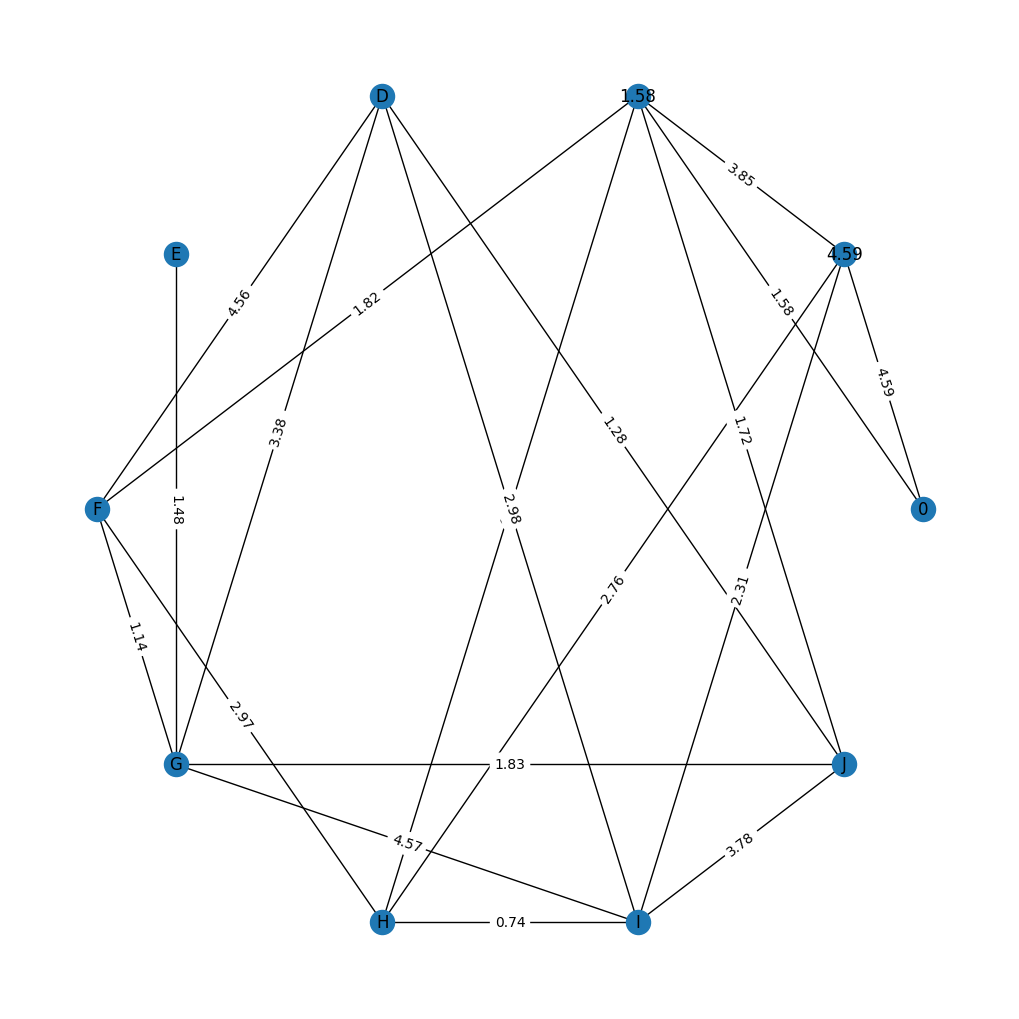

In [8]:
import sys

## Define which node we should start from
startNode = 'A'

## Initial step, set all distances to infinite (sys.maxsize) unless it it the starting node, which should be set to 0
for i in graph.nodes:
    if i == startNode:
        graph.add_node(i, distance=0, checked=False, previous=None)
    else:
        graph.add_node(i, distance=sys.maxsize, checked=False, previous=None)

## Define a step for Dijkstra
def dijkstra_step(localGraph):
    ## Get all the nodes distances and whether they have been checked already...
    distances = nx.get_node_attributes(localGraph, 'distance')
    checked = nx.get_node_attributes(localGraph, "checked")

    ## Uncomment if you want to check what the current distances and checked values for all nodes are
    # print(distances)
    # print(checked)

    ## Used to store which node we are going to use
    selectedNode = None

    ## Find the node that has the lowest distance that hasn't already been checked
    for i in localGraph.nodes:
        if not(checked[i]):
            if selectedNode == None:
                selectedNode = dict(node=i, distance=distances[i], checked=checked[i])
            elif selectedNode['distance'] > distances[i]:
                selectedNode = dict(node=i, distance=distances[i], checked=checked[i])

    ## If a node was selected...
    if selectedNode != None:
        print("Selected Node:", selectedNode)

        ## Set the selected nodes 'checked' value to True 
        localGraph.nodes[selectedNode['node']]['checked'] = True
        
        ## For each edge connected to this node, update all connected nodes if it has a shorter overall path
        edges = nx.to_edgelist(localGraph, selectedNode['node'])
        for e in edges:
            alt = selectedNode['distance'] + e[2]['weight']
            if alt < distances[e[1]]:
                localGraph.nodes[e[1]]['distance'] = np.round(alt, 2)
                localGraph.nodes[e[1]]['previous'] = selectedNode['distance']
    else:
        print("No node selected")

    ## Present the updated graph back to the user
    return localGraph

## Store the new graph so it can be displayed
newGraph = dijkstra_step(graph)

## Uncomment if you want to see the new values for distance and checked
# print(nx.get_node_attributes(newGraph, 'distance'))
# print(nx.get_node_attributes(newGraph, 'checked'))

## Get the list of all distances. If the distance is maxsize, replace it by the nodes name
nodeLabels = nx.get_node_attributes(newGraph, 'distance')
for i in nodeLabels:
    if nodeLabels[i] == sys.maxsize:
        nodeLabels[i] = i

## Show me my graph!
plt.figure(figsize=[10,10])
nx.draw(newGraph, pos)
nx.draw_networkx_labels(newGraph, pos, labels=nodeLabels)
nx.draw_networkx_edge_labels(newGraph, pos, edge_labels=nx.get_edge_attributes(newGraph, 'weight'))
plt.show()

### Generating some widgets

Just as with the Bubble Sort, we can create some widgets to control the interactivity.

In [9]:
## Lets set up some controls 
playGraph = widgets.Play(min=0, max=numberNodes, interval=1000, value=0)
timelineGraph = widgets.IntProgress(min=0, max=numberNodes)
widgets.link((playGraph, 'value'), (timelineGraph, 'value'))
controls = widgets.VBox([playGraph, timelineGraph],layout=widgets.Layout(justify_content='space-around'))
controls

### Combining everything together

Lets link it all together! We have a `resetDisplayGraph` function, which we can call when we press *Pause* or *Stop*. This will reset the graph...

We can then build a function to utilise the widgets with the step function.

Finally, we join the `resetDisplayGraph` to the visualisation not playing.

Rather than using `@interact`, we are going to use `interactive`. This allows for the output to be customized. In this we need to specified the size of the output, so that we don't get a flicker as the graph redraws...

In [10]:
from ipywidgets import interactive

## Setup the graph, and a function so we can reset it if needed later
displayGraph = graph
def resetDisplayGraph():
    displayGraph = graph
    for i in displayGraph.nodes():
        if i == startNode:
            displayGraph.add_node(i, distance=0, checked=False, previous=None)
        else:
            displayGraph.add_node(i, distance=sys.maxsize, checked=False, previous=None)
resetDisplayGraph()

## Setup our interaction
def updateGraph(x):
    global displayGraph

    ## Print the timestep, so we can see it update more easily
    print("Timestep: ", x)

    ## Run a step
    displayGraph = dijkstra_step(displayGraph)

    ##Display the graph
    nodeLabels = nx.get_node_attributes(displayGraph, 'distance')
    for i in nodeLabels:
        if nodeLabels[i] == sys.maxsize:
            nodeLabels[i] = i
    plt.figure(figsize=[10,10])
    nx.draw(displayGraph, pos)
    nx.draw_networkx_labels(displayGraph, pos, labels=nodeLabels)
    nx.draw_networkx_edge_labels(displayGraph, pos, edge_labels=nx.get_edge_attributes(displayGraph, 'weight'))
    plt.show()

## This function detects that the stop button has been pressed, and resets the graph!
def callback(change):
    if change['new']:
         resetDisplayGraph()
playGraph.observe(callback, names=['_playing'])

## Setup the interactive elements. Because it will redraw, we need to use interactive rather than interact, to force the window to be a certain size. Interact will work as well, but might flash a lot!
interactive_graph = interactive(updateGraph, x=playGraph)
output = interactive_graph.children[-1]
output.layout.height = '800px'

## Display the widget!
widgets.HBox([controls, interactive_graph])

## Exercises
### Exercise 1 - Sorting
Visualise a **Selection Sort** ([here](https://en.wikipedia.org/wiki/Selection_sort)) and an **Insertion Sort** algorithm ([here](https://en.wikipedia.org/wiki/Insertion_sort))

In [11]:
## Exercise 1 code here! ##

### Exercise 2 - Graphs
Generate 20 nodes, each with at least 3 edges connected to each node. Each edge should have a random weight between 1 and 10. Visualise the **Dijkstra's search** on the graph, starting at random node. You should also highlight completed nodes.

In [12]:
## Exercise 2 code here! ##

## Bonus Exercises

### Bonus Exercise 1A - Advanced Sorting
Visualise the **Quick sort** algorithm ([here](https://en.wikipedia.org/wiki/Quicksort)).

### Bonus Exercise 1B - Multiple Sorts
Visualise all 4 sorting algorithms (Bubble, Selection, Insert and Quick) on the same data at the same time in the same widget

In [13]:
## Bonus Exercise 1 code here! ##

### Bonus Exercise 2 - Advanced Graphs
Visualise the **A\* search** on the graph described in Exercise 2 which starts and ends at random nodes (algorithm [here](https://en.wikipedia.org/wiki/A*_search_algorithm)).

In [14]:
## Bonus Exercise 2 code here! ##